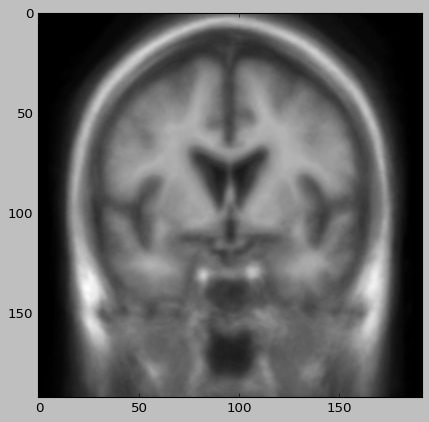

In [1]:
import cornucopia as cc
import matplotlib.pyplot as plt
import os
from urllib.request import urlretrieve
from tempfile import gettempdir
import torch

def plot_mri(dat):
    plt.style.use('classic')
    plt.imshow(torch.rot90(dat[0, :, dat.shape[2]//2]).cpu(), cmap='gray')

# download demo dataset
url = 'https://bitbucket.org/nipy/nitest-freesurfer/raw/0d307865704df71c3b2248139714806aad47139d/fsaverage/mri/T1.mgz'
fname = os.path.join(gettempdir(), 'T1.mgz')
urlretrieve(url, fname)

# load from disk
dat = cc.LoadTransform(dtype='float32')(fname)
dat = cc.CropTransform(32)(dat)
plot_mri(dat)

In [2]:
import torchio as tio

augment = tio.Compose([
    tio.RandomAffine(),
    tio.RandomElasticDeformation(),
    tio.RandomAnisotropy(),
    tio.RandomNoise(),
])

dat = dat.cpu()
%timeit dat1 = augment(dat)

996 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


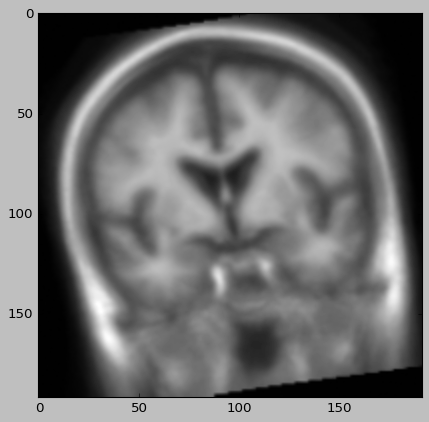

In [3]:
plot_mri(augment(dat))

In [4]:
lowres = cc.randomize(cc.LowResSliceTransform)(cc.random.Uniform(0, 4),
                                               cc.random.Uniform(0, 1))
augment = cc.SequentialTransform([
    cc.RandomAffineElasticTransform(),
    lowres,
    cc.GaussianNoiseTransform()
])


dat = dat.cpu()
dat1 = augment(dat)  # precompile
%timeit augment(dat)

dat = dat.cuda()
dat1 = augment(dat)  # precompile
%timeit augment(dat)

3.12 s ± 559 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
54.8 ms ± 5.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


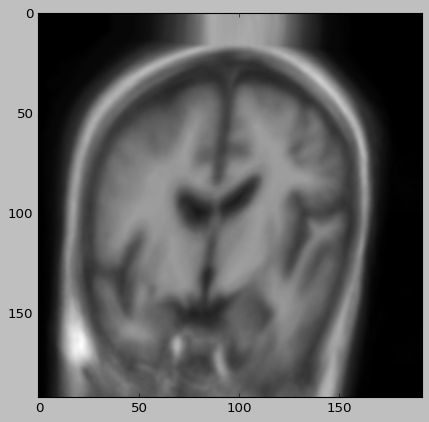

In [6]:
plot_mri(augment(dat))